##Импорт библиотек

In [ ]:
import numpy as np 
import pandas as pd
import h5py #?
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

titanic = pd.read_csv('titanic.csv')
iris = load_iris()

###Предобработка данных из датасета "Титаник"

In [ ]:
titanic.head()

PassengerID                                           Name PClass    Age  \
0            1                   Allen, Miss Elisabeth Walton    1st  29.00   
1            2                    Allison, Miss Helen Loraine    1st   2.00   
2            3            Allison, Mr Hudson Joshua Creighton    1st  30.00   
3            4  Allison, Mrs Hudson JC (Bessie Waldo Daniels)    1st  25.00   
4            5                  Allison, Master Hudson Trevor    1st   0.92   

      Sex  Survived  SexCode  
0  female         1        1  
1  female         0        1  
2    male         0        0  
3  female         0        1  
4    male         1        0

In [ ]:
titanic.isnull().sum(), titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerID  1313 non-null   int64  
 1   Name         1313 non-null   object 
 2   PClass       1313 non-null   object 
 3   Age          756 non-null    float64
 4   Sex          1313 non-null   object 
 5   Survived     1313 non-null   int64  
 6   SexCode      1313 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 71.9+ KB


(PassengerID      0
 Name             0
 PClass           0
 Age            557
 Sex              0
 Survived         0
 SexCode          0
 dtype: int64, None)

In [ ]:
titanic = titanic.dropna()

In [ ]:
titanic = titanic.drop(columns = ['Name', 'Sex', 'PassengerID'])

In [ ]:
mapping = {'1st': 1,
           '2nd': 2,
           '3rd': 3 }

titanic['PClass'] = titanic['PClass'].map(mapping)
titanic

PClass    Age  Survived  SexCode
0          1  29.00         1        1
1          1   2.00         0        1
2          1  30.00         0        0
3          1  25.00         0        1
4          1   0.92         1        0
...      ...    ...       ...      ...
1308       3  27.00         0        0
1309       3  26.00         0        0
1310       3  22.00         0        0
1311       3  24.00         0        0
1312       3  29.00         0        0

[756 rows x 4 columns]

In [ ]:
X = titanic.drop(columns = ['Survived'])
Y = titanic['Survived']
X = X.values
Y = Y.values

In [ ]:
X.shape

(756, 3)

In [ ]:
Y.shape

(756,)

##Нейронная сеть

In [ ]:
import random
import numpy as np
#титаник
INPUT_DIM = 3
OUT_DIM = 2
H_DIM = 5

Accuracy: 0.7473544973544973


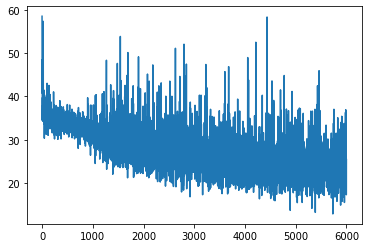

In [ ]:

def relu(t):
    return np.maximum(t, 0)

def softmax(t):
    out = np.exp(t)
    return out / np.sum(out)

def softmax_batch(t):
    out = np.exp(t)
    return out / np.sum(out, axis=1, keepdims=True)

def sparse_cross_entropy(z, y):
    return -np.log(z[0, y])

def sparse_cross_entropy_batch(z, y):
    return -np.log(np.array([z[j, y[j]] for j in range(len(y))]))

def to_full_batch(y, num_classes):
    y_full = np.zeros((len(y), num_classes))
    for j, yj in enumerate(y):
        y_full[j, yj] = 1
    return y_full

def relu_deriv(t):
    return (t >= 0).astype(float)

dataset = [(X[i][None, ...], Y[i]) for i in range(len(Y))]

W1 = np.random.rand(INPUT_DIM, H_DIM)
b1 = np.random.rand(1, H_DIM)
W2 = np.random.rand(H_DIM, OUT_DIM)
b2 = np.random.rand(1, OUT_DIM)

W1 = 2 * np.dot((W1 - 0.5), np.sqrt(1/INPUT_DIM))
b1 = 2 * np.dot((b1 - 0.5), np.sqrt(1/INPUT_DIM))
W2 = 2 * np.dot((W2 - 0.5), np.sqrt(1/H_DIM))
b2 = 2 * np.dot((b2 - 0.5), np.sqrt(1/H_DIM))

ALPHA = 0.0002 #шаг 
NUM_EPOCHS = 400 #число эпох
BATCH_SIZE = 50 #количество объектов в одном батче

loss_arr = []

for ep in range(NUM_EPOCHS):
    random.shuffle(dataset)
    for i in range(len(dataset) // BATCH_SIZE):

        batch_x, batch_y = zip(*dataset[i*BATCH_SIZE : i*BATCH_SIZE+BATCH_SIZE])
        x = np.concatenate(batch_x, axis=0)
        y = np.array(batch_y)

        # Прямое распространение
        t1 = np.dot(x, W1) + b1
        h1 = relu(t1)
        t2 = np.dot(h1, W2) + b2
        z = softmax_batch(t2)
        E = np.sum(sparse_cross_entropy_batch(z, y))

        # Обратное распространение
        y_full = to_full_batch(y, OUT_DIM)
        dE_dt2 = z - y_full
        dE_dW2 = np.dot(h1.T,dE_dt2)
        dE_db2 = np.sum(dE_dt2, axis=0, keepdims=True)
        dE_dh1 = np.dot(dE_dt2, W2.T)
        #print(relu_deriv(t1))
        dE_dt1 = dE_dh1 * relu_deriv(t1)#.reshape(10, 5))
        dE_dW1 = np.dot(x.T,dE_dt1)
        dE_db1 = np.sum(dE_dt1, axis=0, keepdims=True)

        # Обновление параметров
        W1 = W1 - ALPHA * dE_dW1
        b1 = b1 - ALPHA * dE_db1
        W2 = W2 - ALPHA * dE_dW2
        b2 = b2 - ALPHA * dE_db2

        loss_arr.append(E)

def predict(x): #предсказание для каждого объекта
    t1 = np.dot(x, W1) + b1
    h1 = relu(t1)
    t2 = np.dot(h1, W2) + b2
    z = softmax_batch(t2)
    return z

def calc_accuracy(): #расчёт accuracy для каждого элемента
    correct = 0
    for x, y in dataset:
        z = predict(x)
        y_pred = np.argmax(z)
        if y_pred == y:
            correct += 1
    acc = correct / len(dataset)
    return acc

accuracy = calc_accuracy()
print("Accuracy:", accuracy)

import matplotlib.pyplot as plt
plt.plot(loss_arr)
plt.show()

Accuracy: 0.9666666666666667


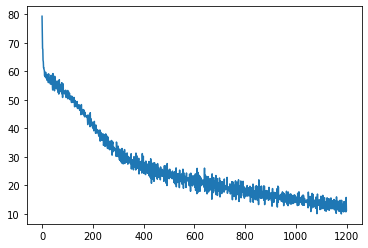

In [ ]:
import random
import numpy as np

INPUT_DIM = 4
OUT_DIM = 3
H_DIM = 10

def relu(t):
    return np.maximum(t, 0)

def softmax(t):
    out = np.exp(t)
    return out / np.sum(out)

def softmax_batch(t):
    out = np.exp(t)
    return out / np.sum(out, axis=1, keepdims=True)

def sparse_cross_entropy(z, y):
    return -np.log(z[0, y])

def sparse_cross_entropy_batch(z, y):
    return -np.log(np.array([z[j, y[j]] for j in range(len(y))]))

def to_full(y, num_classes):
    y_full = np.zeros((1, num_classes))
    y_full[0, y] = 1
    return y_full

def to_full_batch(y, num_classes):
    y_full = np.zeros((len(y), num_classes))
    for j, yj in enumerate(y):
        y_full[j, yj] = 1
    return y_full

def relu_deriv(t):
    return (t >= 0).astype(float)

from sklearn import datasets
iris = datasets.load_iris()
dataset = [(iris.data[i][None, ...], iris.target[i]) for i in range(len(iris.target))]

W1 = np.random.rand(INPUT_DIM, H_DIM)
b1 = np.random.rand(1, H_DIM)
W2 = np.random.rand(H_DIM, OUT_DIM)
b2 = np.random.rand(1, OUT_DIM)

W1 = (W1 - 0.5) * 2 * np.sqrt(1/INPUT_DIM)
b1 = (b1 - 0.5) * 2 * np.sqrt(1/INPUT_DIM)
W2 = (W2 - 0.5) * 2 * np.sqrt(1/H_DIM)
b2 = (b2 - 0.5) * 2 * np.sqrt(1/H_DIM)

ALPHA = 0.0002
NUM_EPOCHS = 400
BATCH_SIZE = 50

loss_arr = []

for ep in range(NUM_EPOCHS):
    random.shuffle(dataset)
    for i in range(len(dataset) // BATCH_SIZE):

        batch_x, batch_y = zip(*dataset[i*BATCH_SIZE : i*BATCH_SIZE+BATCH_SIZE])
        x = np.concatenate(batch_x, axis=0)
        y = np.array(batch_y)

        
        t1 = np.dot(x, W1) + b1
        h1 = relu(t1)
        t2 = np.dot(h1, W2) + b2
        z = softmax_batch(t2)
        E = np.sum(sparse_cross_entropy_batch(z, y))

        
        y_full = to_full_batch(y, OUT_DIM)
        dE_dt2 = z - y_full
        dE_dW2 = np.dot(h1.T, dE_dt2)
        dE_db2 = np.sum(dE_dt2, axis=0, keepdims=True)
        dE_dh1 = np.dot(dE_dt2, W2.T)
        dE_dt1 = dE_dh1 * relu_deriv(t1)
        #print(relu_deriv(t1))
        dE_dW1 = np.dot(x.T, dE_dt1)
        dE_db1 = np.sum(dE_dt1, axis=0, keepdims=True)

        
        W1 = W1 - ALPHA * dE_dW1
        b1 = b1 - ALPHA * dE_db1
        W2 = W2 - ALPHA * dE_dW2
        b2 = b2 - ALPHA * dE_db2

        loss_arr.append(E)

def predict(x):
    t1 = np.dot(x, W1) + b1
    h1 = relu(t1)
    t2 = np.dot(h1, W2) + b2
    z = softmax_batch(t2)
    return z

def calc_accuracy():
    correct = 0
    for x, y in dataset:
        z = predict(x)
        y_pred = np.argmax(z)
        if y_pred == y:
            correct += 1
    acc = correct / len(dataset)
    return acc

accuracy = calc_accuracy()
print("Accuracy:", accuracy)

import matplotlib.pyplot as plt
plt.plot(loss_arr)
plt.show()

##Water_dataframe

In [ ]:
water_dataframe = pd.read_csv('water_potability_preprocessed_without_anomalies.csv')

In [ ]:
X = water_dataframe.drop(columns = ['Potability'])
y = water_dataframe['Potability']
X = X.values
Y = y.values

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
X.shape

(2980, 10)

In [ ]:
Y.shape

(2980,)

Accuracy: 0.6791946308724832


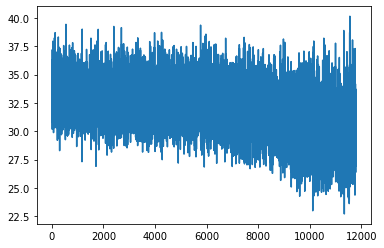

In [ ]:
import random
import numpy as np

INPUT_DIM = 10
OUT_DIM = 2
H_DIM = 6

def relu(t):
    return np.maximum(t, 0)

def softmax(t):
    out = np.exp(t)
    return out / np.sum(out)

def softmax_batch(t):
    out = np.exp(t)
    return out / np.sum(out, axis=1, keepdims=True)

def sparse_cross_entropy(z, y):
    return -np.log(z[0, y])

def sparse_cross_entropy_batch(z, y):
    return -np.log(np.array([z[j, y[j]] for j in range(len(y))]))

def to_full(y, num_classes):
    y_full = np.zeros((1, num_classes))
    y_full[0, y] = 1
    return y_full

def to_full_batch(y, num_classes):
    y_full = np.zeros((len(y), num_classes))
    for j, yj in enumerate(y):
        y_full[j, yj] = 1
    return y_full

def relu_deriv(t):
    return (t >= 0).astype(float)


dataset = [(X[i][None, ...], Y[i]) for i in range(len(Y))]

W1 = np.random.rand(INPUT_DIM, H_DIM)
b1 = np.random.rand(1, H_DIM)
W2 = np.random.rand(H_DIM, OUT_DIM)
b2 = np.random.rand(1, OUT_DIM)

W1 = (W1 - 0.5) * 2 * np.sqrt(1/INPUT_DIM)
b1 = (b1 - 0.5) * 2 * np.sqrt(1/INPUT_DIM)
W2 = (W2 - 0.5) * 2 * np.sqrt(1/H_DIM)
b2 = (b2 - 0.5) * 2 * np.sqrt(1/H_DIM)

ALPHA = 0.0002
NUM_EPOCHS = 200
BATCH_SIZE = 50

loss_arr = []

for ep in range(NUM_EPOCHS):
    random.shuffle(dataset)
    for i in range(len(dataset) // BATCH_SIZE):

        batch_x, batch_y = zip(*dataset[i*BATCH_SIZE : i*BATCH_SIZE+BATCH_SIZE])
        x = np.concatenate(batch_x, axis=0)
        y = np.array(batch_y)

        
        t1 = np.dot(x, W1) + b1
        h1 = relu(t1)
        t2 = np.dot(h1, W2) + b2
        z = softmax_batch(t2)
        E = np.sum(sparse_cross_entropy_batch(z, y))

        
        y_full = to_full_batch(y, OUT_DIM)
        dE_dt2 = z - y_full
        dE_dW2 = np.dot(h1.T, dE_dt2)
        dE_db2 = np.sum(dE_dt2, axis=0, keepdims=True)
        dE_dh1 = np.dot(dE_dt2, W2.T)
        dE_dt1 = dE_dh1 * relu_deriv(t1)
        #print(relu_deriv(t1))
        dE_dW1 = np.dot(x.T, dE_dt1)
        dE_db1 = np.sum(dE_dt1, axis=0, keepdims=True)

        
        W1 = W1 - ALPHA * dE_dW1
        b1 = b1 - ALPHA * dE_db1
        W2 = W2 - ALPHA * dE_dW2
        b2 = b2 - ALPHA * dE_db2

        loss_arr.append(E)

def predict(x):
    t1 = np.dot(x, W1) + b1
    h1 = relu(t1)
    t2 = np.dot(h1, W2) + b2
    z = softmax_batch(t2)
    return z

def calc_accuracy():
    correct = 0
    for x, y in dataset:
        z = predict(x)
        y_pred = np.argmax(z)
        if y_pred == y:
            correct += 1
    acc = correct / len(dataset)
    return acc

accuracy = calc_accuracy()
print("Accuracy:", accuracy)

import matplotlib.pyplot as plt
plt.plot(loss_arr)
plt.show()

##Car_details_dataframe

In [ ]:
car_dataframe = pd.read_csv("car_details_from_car_dekho_preprocessing_without_anomalies.csv")

FileNotFoundError: ignored

In [ ]:
X = car_dataframe.drop(columns = ['selling_price'])
y = car_dataframe['selling_price']
X = X.values
Y = y.values

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
Y = np.array([Y])
I = np.concatenate((X, Y.T), axis=1)